# Setting up the notebook

<a href="https://colab.research.google.com/github/jkoks-svg/ML_Project_ENSAE/blob/main/ML_Project_ENSAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !pwd
# !ls /content/drive/MyDrive/dropoutdata.csv

Preprocessing Libraries

In [1]:
!pip install doubleml
!pip install xgboost
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import doubleml as dml

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

# Set notebook styling for better visuals

In [6]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset

In [10]:
df=pd.read_csv(r"C:\Users\jortk\OneDrive\OneDrive Documenten\ENSAE\ENSAE ML for Econometrics\Project\data.csv", sep=";")
#df=pd.read_csv("/content/drive/MyDrive/dropoutdata.csv", sep=";")

# Display the first few rows of the dataset to get an overview

In [12]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Description of key variables in the dataset

In [14]:
print("Dataset Description:")
dataset_description = {
    "Target": "Student status: Graduate, Dropout, or Enrolled",
    "Course": "Study program the student is enrolled in",
    "Age at enrollment": "Age of the student at the time of enrollment",
    "Gender": "Binary indicator (0 = Male, 1 = Female)",
    "Scholarship holder": "Binary indicator for receiving a scholarship (0 = No, 1 = Yes)",
    "Tuition fees up to date": "Indicator if tuition fees are paid (0 = No, 1 = Yes)",
    "Debtor": "Indicator if the student has outstanding debts (0 = No, 1 = Yes)",
    "Admission grade": "Grade obtained at admission",
    "Previous qualification": "Previous academic qualification of the student",
    "Previous qualification grade": "Grade obtained in the previous qualification",
    "Displaced": "Indicator if the student is displaced (0 = No, 1 = Yes)",
    "Educational special needs": "Indicator for special education needs (0 = No, 1 = Yes)",
    "International": "Indicator if the student is international (0 = No, 1 = Yes)",
    "Mother's qualification": "Educational qualification of the student's mother",
    "Father's qualification": "Educational qualification of the student's father",
    "Mother's occupation": "Occupation of the student's mother",
    "Father's occupation": "Occupation of the student's father",
    "Unemployment rate": "Unemployment rate in the country during enrollment",
    "GDP growth rate": "GDP growth rate at the time of enrollment",
    "Inflation rate": "Inflation rate at the time of enrollment"
}
for var, desc in dataset_description.items():
    print(f"{var}: {desc}")

Dataset Description:
Target: Student status: Graduate, Dropout, or Enrolled
Course: Study program the student is enrolled in
Age at enrollment: Age of the student at the time of enrollment
Gender: Binary indicator (0 = Male, 1 = Female)
Scholarship holder: Binary indicator for receiving a scholarship (0 = No, 1 = Yes)
Tuition fees up to date: Indicator if tuition fees are paid (0 = No, 1 = Yes)
Debtor: Indicator if the student has outstanding debts (0 = No, 1 = Yes)
Admission grade: Grade obtained at admission
Previous qualification: Previous academic qualification of the student
Previous qualification grade: Grade obtained in the previous qualification
Displaced: Indicator if the student is displaced (0 = No, 1 = Yes)
Educational special needs: Indicator for special education needs (0 = No, 1 = Yes)
International: Indicator if the student is international (0 = No, 1 = Yes)
Mother's qualification: Educational qualification of the student's mother
Father's qualification: Educational qua

# Check for missing values in the dataset

In [16]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


In [18]:
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

The data consists of 4424 observations and is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal. We use Target as our outcome variable, **Y**, in our analysis.

# Visualization of the target variable distribution

C:\Users\jortk\AppData\Local\Temp\ipykernel_11008\759501499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target", data=df, palette="pastel")


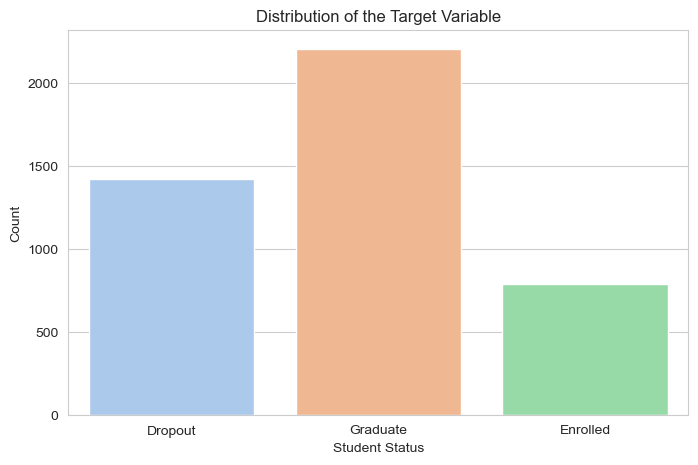

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Target", data=df, palette="pastel")
plt.title("Distribution of the Target Variable")
plt.xlabel("Student Status")
plt.ylabel("Count")
plt.show()

Dropout rates seem to be highly associated with Previous Qualification Grade, Scholarship Holder status and Gender.


# Visualizing dropout rates across different study programs

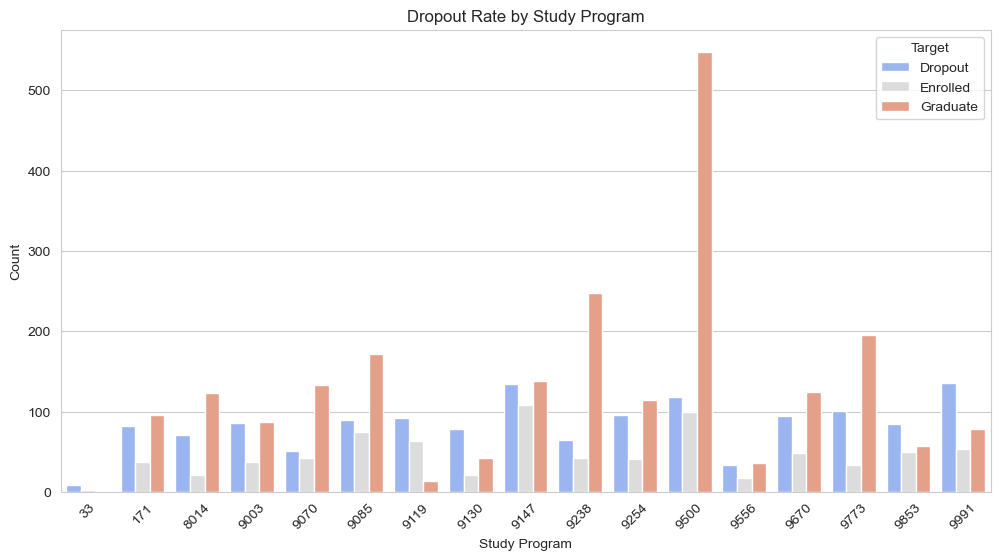

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Course", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Study Program")
plt.xlabel("Study Program")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Boxplot to compare admission grades across student statuses

C:\Users\jortk\AppData\Local\Temp\ipykernel_11008\871766737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")


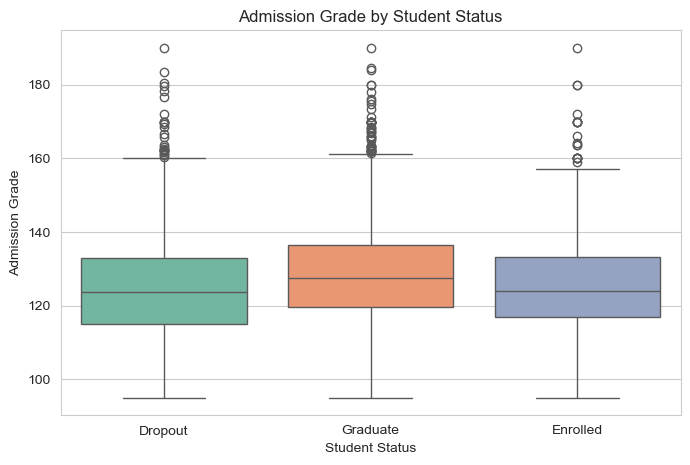

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")
plt.title("Admission Grade by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

C:\Users\jortk\AppData\Local\Temp\ipykernel_11008\1710389761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")


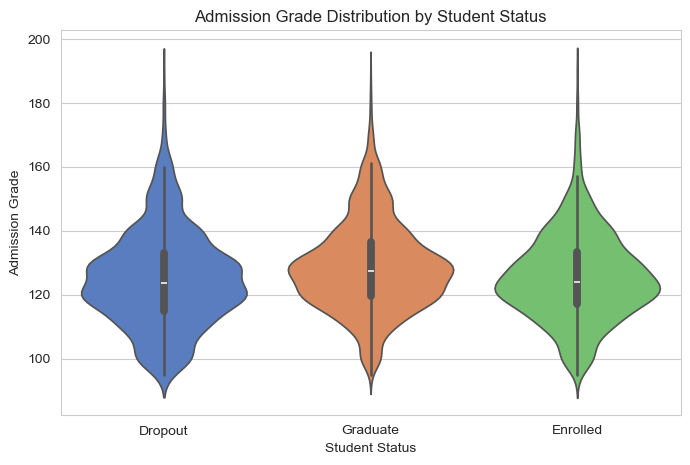

In [26]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")
plt.title("Admission Grade Distribution by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

# Comparing dropout rates among scholarship holders and non-holders

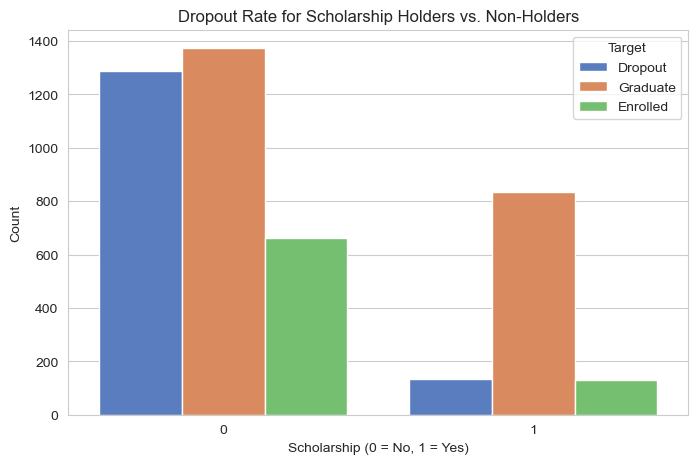

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Scholarship holder", hue="Target", data=df, palette="muted")
plt.title("Dropout Rate for Scholarship Holders vs. Non-Holders")
plt.xlabel("Scholarship (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

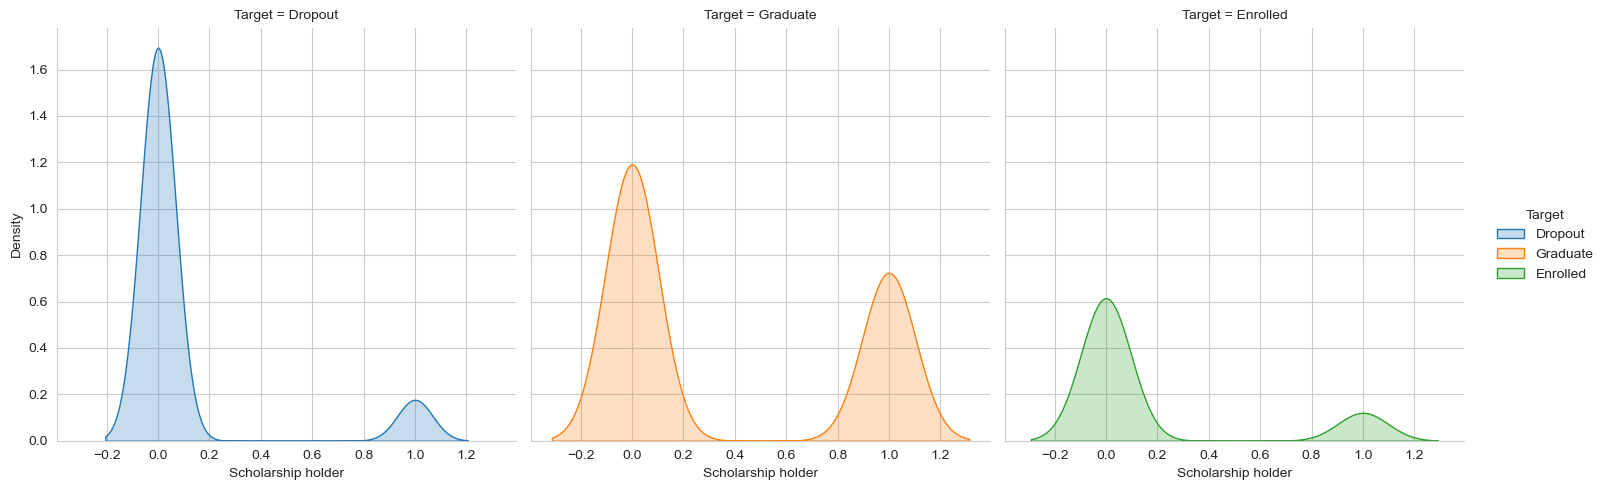

In [30]:
_ = sns.displot(df, x="Scholarship holder", hue="Target", col="Target",
                kind="kde", fill=True)

# Comparing dropout rates among gender

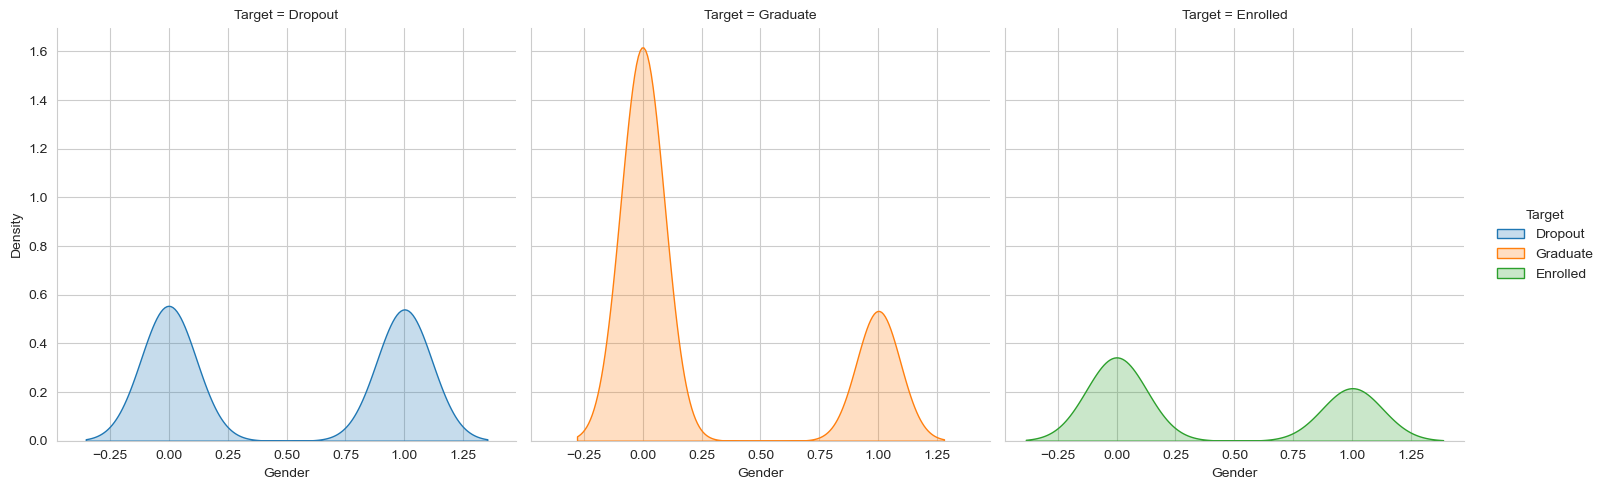

In [32]:
_ = sns.displot(df, x="Gender", hue="Target", col="Target",
                kind="kde", fill=True)

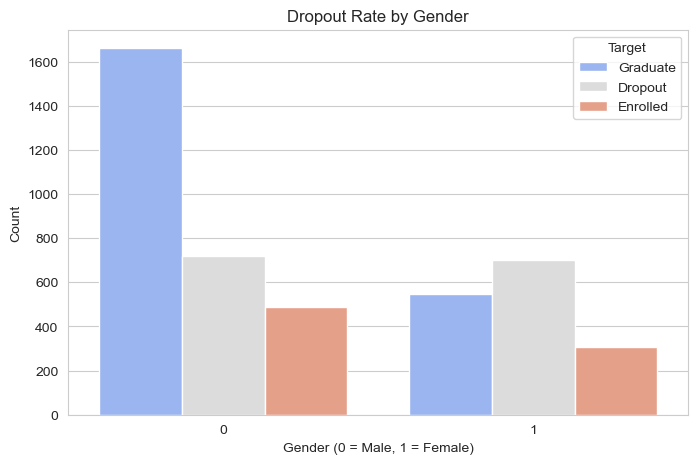

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

# Distribution of age at enrollment

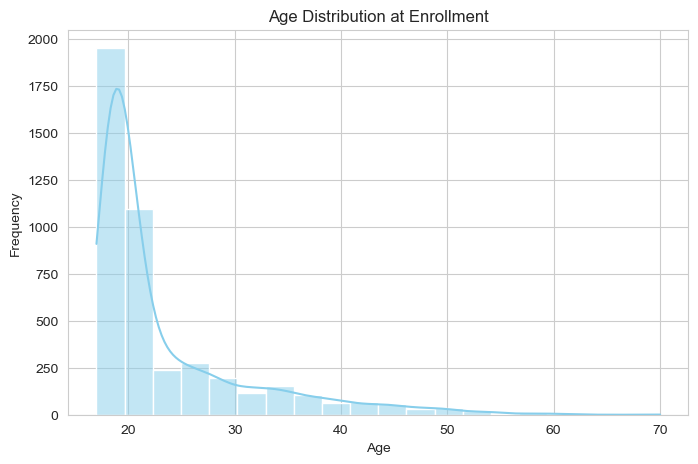

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age at enrollment"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution at Enrollment")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of selected numerical features

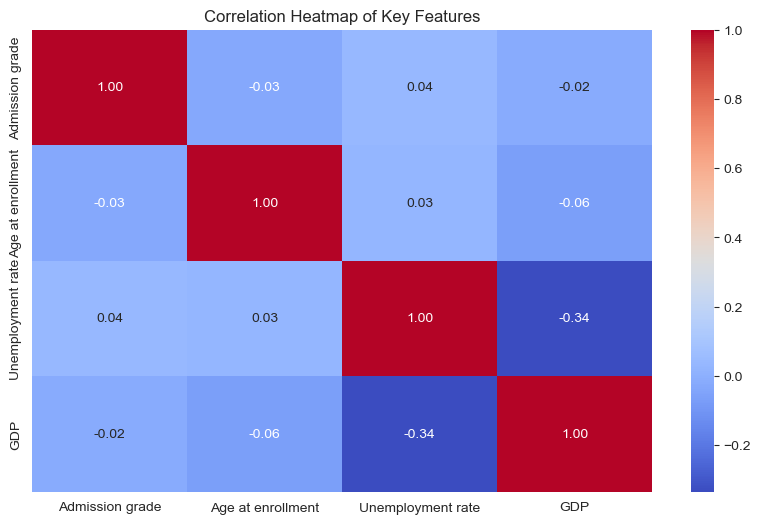

In [38]:
selected_features = ["Admission grade", "Previous qualification grade", "Age at enrollment", "Unemployment rate", "GDP", "Inflation"]

existing_features = [feature for feature in selected_features if feature in df.columns]
plt.figure(figsize=(10, 6))
sns.heatmap(df[existing_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()

C:\Users\jortk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


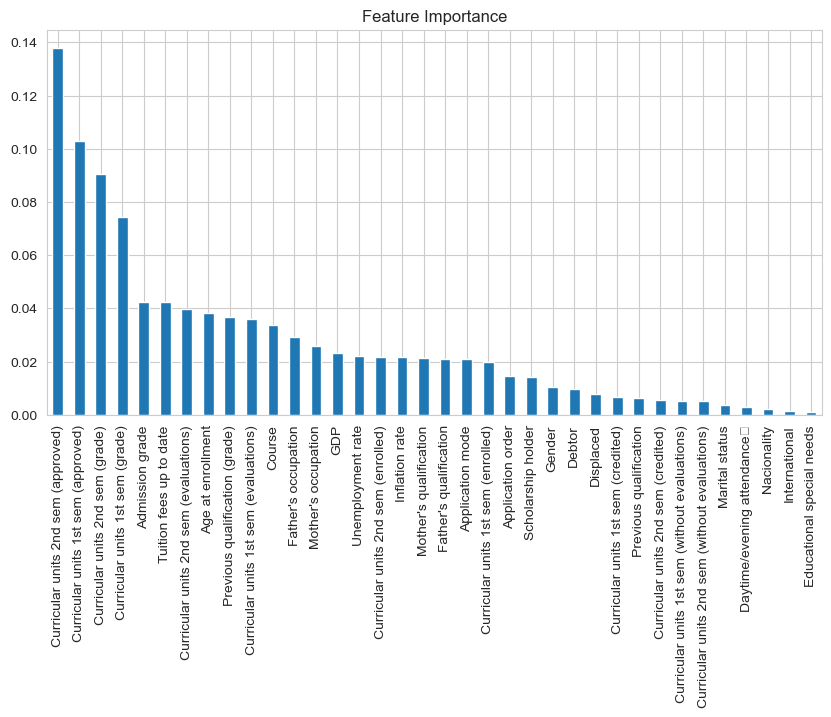

In [67]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Target'])  # Adjust as needed
y = df['Target']
model = RandomForestClassifier()
model.fit(X, y)

feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.show()

Example question: What is the effect of scholarships on student dropout?

Treatment (T): Scholarship holder (0 = No, 1 = Yes)

Outcome (Y): Dropout status (Graduate, Dropout, Enrolled)

Confounders (X): Factors that influence both scholarship assignment and dropout, such as:
Socioeconomic status (tuition paid, parents’ education, employment, etc.)
Admission grade & previous qualification (because scholarships are often merit-based)
Academic performance (first semester grades, course load, etc.)

I tested the code below using every feature as cofounder. This is wrong, because I included post-treatment effects. 

C:\Users\jortk\anaconda3\Lib\site-packages\doubleml\utils\_checks.py:205: UserWarning: Propensity predictions from learner RandomForestClassifier(random_state=42) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'


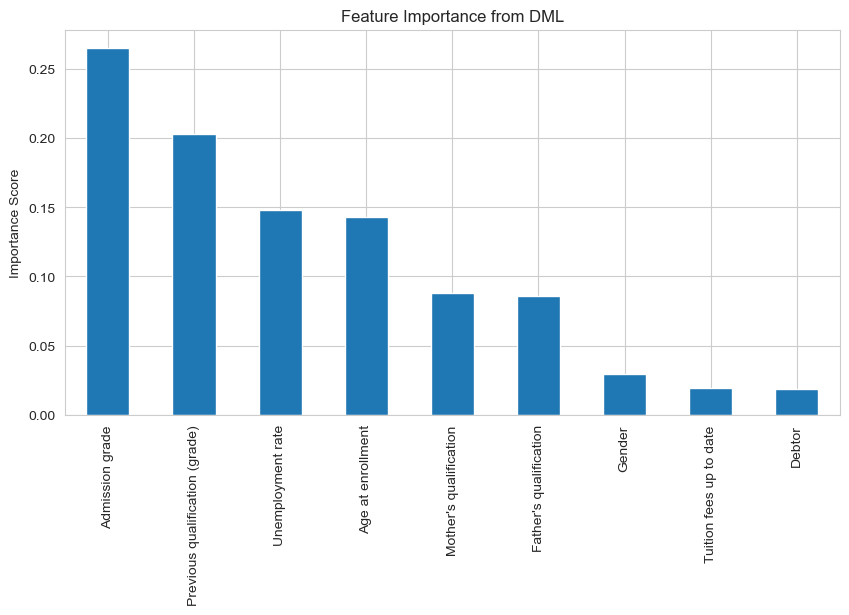

In [58]:
import numpy as np
import pandas as pd
import doubleml as dml
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

# Load dataset (make sure it's preloaded as df)
#df = pd.read_csv('data.csv')  # Adjust the path if necessary
df=pd.read_csv(r"C:\Users\jortk\OneDrive\OneDrive Documenten\ENSAE\ENSAE ML for Econometrics\Project\data.csv", sep=";")
# Define Treatment, Outcome, and Covariates
treatment = "Scholarship holder"  # Binary treatment variable
outcome = "Target"  # Multiclass outcome (Dropout, Graduate, Enrolled)

# Define Potential Confounders
covariates = [
    "Age at enrollment", "Admission grade", "Previous qualification (grade)", 
    "Father's qualification", "Mother's qualification", "Unemployment rate", 
    "Tuition fees up to date", "Debtor", "Gender"
]

# Drop missing values for simplicity (or handle them properly)
df = df.dropna(subset=[treatment, outcome] + covariates)

# Encode categorical target variable into numeric values (Dropout = 1, Graduate = 0)
df[outcome] = df[outcome].map({'Dropout': 1, 'Enrolled': 2, 'Graduate': 0})

# Split Data into Training and Test Set
X = df[covariates]
T = df[treatment]
Y = df[outcome]

# Standardize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets (to fit the model before using it)
X_train, X_test, T_train, T_test = train_test_split(X_scaled, T, test_size=0.2, random_state=42)

# Fit the RandomForest model for treatment (this step was missing)
ml_m = RandomForestClassifier(n_estimators=100, random_state=42)
ml_m.fit(X_train, T_train)  # ✅ Now, we explicitly fit the model before extracting feature importance

ml_l = LassoCV(cv=5)  # Lasso Regression for outcome model
data = dml.DoubleMLData.from_arrays(X_scaled, Y, T)
dml_model = dml.DoubleMLPLR(data, ml_l, ml_m)
dml_model.fit()

# # Double Machine Learning Setup
# ml_l = LassoCV(cv=5)  # Lasso Regression for outcome model
# ml_m = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest for treatment model

# # DML Data Object
# data = dml.DoubleMLData.from_arrays(X_scaled, Y, T)

# # DML Model (Partialling Out Treatment Effect)
# dml_model = dml.DoubleMLPLR(data, ml_l, ml_m)
# dml_model.fit()

# Extract Feature Importance (from Random Forest Treatment Model)
feature_importance = pd.Series(
    ml_m.feature_importances_, 
    index=covariates
).sort_values(ascending=False)

# Plot Feature Importance
import matplotlib.pyplot as plt
feature_importance.plot(kind='bar', figsize=(10, 5), title="Feature Importance from DML")
plt.ylabel("Importance Score")
plt.show()


C:\Users\jortk\anaconda3\Lib\site-packages\doubleml\utils\_checks.py:205: UserWarning: Propensity predictions from learner RandomForestClassifier(random_state=42) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(f'Propensity predictions from learner {str(learner)} for'


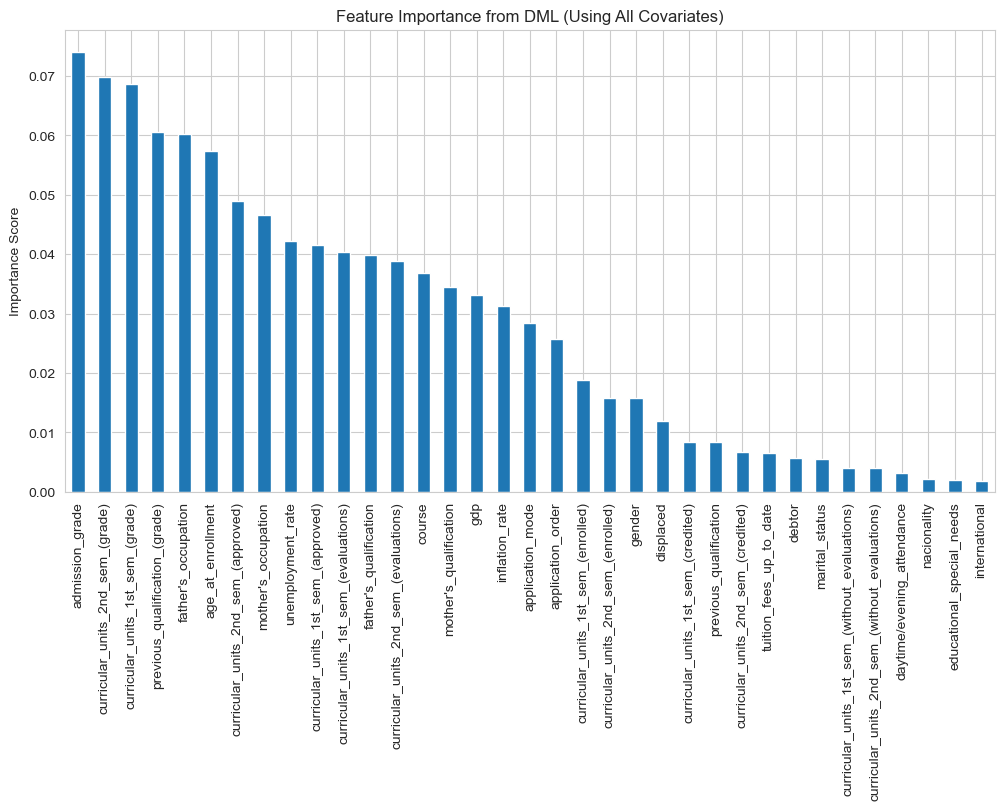

In [72]:
import numpy as np
import pandas as pd
import doubleml as dml
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df=pd.read_csv(r"C:\Users\jortk\OneDrive\OneDrive Documenten\ENSAE\ENSAE ML for Econometrics\Project\data.csv", sep=";")

# Standardize column names (fix spacing issues)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Define Treatment & Outcome Variables
treatment = "scholarship_holder"  # Binary treatment variable
outcome = "target"  # Outcome variable

# Drop missing values for treatment & outcome first
df = df.dropna(subset=[treatment, outcome])

# Encode categorical target variable into numeric values
df[outcome] = df[outcome].map({'Dropout': 1, 'Enrolled': 2, 'Graduate': 0})

# Select ALL other columns as covariates (excluding treatment & outcome)
covariates = [col for col in df.columns if col not in [treatment, outcome]]

# Drop missing values for selected covariates
df = df.dropna(subset=covariates)

# Define Features (X), Treatment (T), and Outcome (Y)
X = df[covariates]
T = df[treatment]
Y = df[outcome]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, T_train, T_test = train_test_split(X_scaled, T, test_size=0.2, random_state=42)

# Fit the RandomForest model for treatment assignment
ml_m = RandomForestClassifier(n_estimators=100, random_state=42)
ml_m.fit(X_train, T_train)  # ✅ Explicitly training the model

# Double Machine Learning Setup
ml_l = LassoCV(cv=5)  # Lasso Regression for outcome model
data = dml.DoubleMLData.from_arrays(X_scaled, Y, T)
dml_model = dml.DoubleMLPLR(data, ml_l, ml_m)
dml_model.fit()

# Extract Feature Importance **AFTER fitting the model**
feature_importance = pd.Series(
    ml_m.feature_importances_, 
    index=covariates
).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar', title="Feature Importance from DML (Using All Covariates)")
plt.ylabel("Importance Score")
plt.show()


In [74]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
import doubleml as dml

# Define ML models for outcome and treatment
ml_l = LassoCV(cv=5)  # Lasso for Outcome Model
ml_m = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest for Treatment Model

# DML Data Setup
data = dml.DoubleMLData.from_arrays(X_scaled, Y, T)

# Fit DML Model
dml_model = dml.DoubleMLPLR(data, ml_l, ml_m)
dml_model.fit()

# Print Causal Effect
print(f"Estimated Treatment Effect: {dml_model.coef}")
print(f"Standard Error: {dml_model.se}")


Estimated Treatment Effect: [-0.1221052]
Standard Error: [0.02491331]


In [76]:
# Split dataset by gender
df_male = df[df["gender"] == 0]
df_female = df[df["gender"] == 1]

# Run the DML model separately for each subgroup
def run_dml_analysis(df_subset):
    X_sub = df_subset[covariates]
    T_sub = df_subset[treatment]
    Y_sub = df_subset[outcome]
    
    X_sub_scaled = scaler.fit_transform(X_sub)
    data_sub = dml.DoubleMLData.from_arrays(X_sub_scaled, Y_sub, T_sub)
    
    ml_l = LassoCV(cv=5)
    ml_m = RandomForestRegressor(n_estimators=100, random_state=42)
    
    dml_model = dml.DoubleMLPLR(data_sub, ml_l, ml_m)
    dml_model.fit()
    
    return dml_model.coef, dml_model.se

# Estimate treatment effects for each group
effect_male, se_male = run_dml_analysis(df_male)
effect_female, se_female = run_dml_analysis(df_female)

print(f"Treatment Effect (Males): {effect_male} ± {se_male}")
print(f"Treatment Effect (Females): {effect_female} ± {se_female}")


Treatment Effect (Males): [-0.15511964] ± [0.02845008]
Treatment Effect (Females): [-0.05395502] ± [0.0510164]


4️⃣ Next Steps
✅ Verify Covariates: Run print(covariates) to confirm the exact set used.
✅ Check for Post-Treatment Bias: If any post-treatment variables were included, re-run the analysis without them.
✅ Compare with DAG: Ensure only valid confounders were used.
